<a href="https://colab.research.google.com/github/JimenaBaripatti/FeatureEngineering/blob/main/Fire_FSA_and_demographic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Fire data

In [3]:
# setting up libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
import statistics
from sklearn.metrics import matthews_corrcoef
from scipy.stats import chi2_contingency
import math
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

%matplotlib inline


# Setting working directory
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data/")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [4]:
#load data sets
#df=pd.read_csv('Fire Incidents Data.csv')
#df_fsa=pd.read_csv('fire_FSA.csv')
#df_station=pd.read_csv('fire-station-locations.csv')

#load data sets from github
df=pd.read_csv('https://raw.githubusercontent.com/JimenaBaripatti/FeatureEngineering/main/data/Fire_Incidents_Data.csv')
df_fsa=pd.read_csv('https://raw.githubusercontent.com/JimenaBaripatti/FeatureEngineering/main/data/fire_FSA.csv')
df_station=pd.read_csv('https://raw.githubusercontent.com/JimenaBaripatti/FeatureEngineering/main/data/fire-station-locations.csv')

In [5]:
df.shape

(17536, 43)

In [6]:
df_fsa.shape

(17536, 45)

##Add new feature: FSA based on Latitude and Longitude

In [22]:
#Extract postal code from latitude and longitude information 
#Reverse Geocoding

from geopy.geocoders import Nominatim #from open street maps and its free
from geopy.geocoders import GoogleV3
from geopy.geocoders import Bing

# create the locator
geolocator = Nominatim(user_agent="jsqzhu@gmail.com") # user_agent="specify_your_app_name_here" 
# you may need to use your own email if the next step gives you HTTP Error 403


## fire station number and FSA

In [5]:
df_station.columns

Index(['_id', 'ID', 'NAME', 'ADDRESS', 'ADDRESS_POINT_ID', 'ADDRESS_ID',
       'CENTRELINE_ID', 'MAINT_STAGE', 'ADDRESS_NUMBER', 'LINEAR_NAME_FULL',
       'POSTAL_CODE', 'GENERAL_USE', 'CLASS_FAMILY_DESC', 'ADDRESS_ID_LINK',
       'PLACE_NAME', 'X', 'Y', 'LATITUDE', 'LONGITUDE', 'WARD_NAME',
       'MUNICIPALITY_NAME', 'OBJECTID', 'geometry'],
      dtype='object')

In [83]:
df_station['NAME'][0][-3:]

'211'

In [7]:
df_station['Incident_Station_Area']=df_station['NAME'].apply(lambda x: x[-3:])

In [8]:
df_station['Incident_Station_Area'].unique()

array(['211', '342', '343', '332', '214', '426', '422', '232', '121',
       '412', '134', '314', '331', '115', '132', '433', '441', '341',
       '434', '311', '323', '234', '435', '424', '221', '224', '244',
       '226', '123', '131', '223', '231', '312', '243', '444', '215',
       '423', '212', '227', '222', '322', '213', '321', '445', '413',
       '116', '432', '225', '431', '415', '113', '133', '425', '233',
       '421', '125', '142', '344', '315', '326', '325', '443', '146',
       '122', '143', '245', '333', '241', '145', '235', '442', '411',
       '112', '111', '114', '242', '346', '334', '324', '141', '313',
       '335', '345', '135'], dtype=object)

In [19]:
df_station['Longitude'] = df_station['geometry'].str.extract('([-]?[0-9]*[.]{0,1}[0-9]{10})')
df_station['Latitude'] = df_station['geometry'].str[53:-2]

In [ ]:
## getting the postal code and extract FSA from firestation location

In [26]:
# getting the postal code and extract FSA from 
#df['location'] = df.apply(lambda x: geolocator.reverse(str(x['Latitude'])+", "+str(x['Longitude'])).address.split(",")[-2], axis=1)
#df['FSA']=df['location'].apply(lambda x: x[0:4])
df[df_fsa['FSA'].isnull()]

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
17500,1964429,81 - Engine Area,NaN,NaN,0,0,3000.0,NaN,NaN,2011-09-26T23:03:00,NaN,01 - Fire,NaN,NaN,NaN,2011-09-26T23:07:00,81 - Vehicle - Electrical,F11126605,214,NaN,VEFH,NaN,2011-09-26T23:35:00,NaN,NaN,NaN,99 - Undetermined (formerly 98),1 - Extinguished by fire department,3,10,51 - Mechanical Failure,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3 - Fire with smoke showing only - including vehicle, outdoor fires",2011-09-26T22:55:12,2011-09-26T23:01:00,0


In [88]:
df_fsa['FSA'].isna().sum()

1

In [89]:
df_fsa['FSA']=df_fsa['FSA'].apply(lambda x: str(x).strip())

In [90]:
df_fsa['FSA'].unique()

array(['M9W', 'M2N', 'M1J', 'M6M', 'M6A', 'M1E', 'M4B', 'M5H', 'M6R',
       'M1N', 'M5A', 'M4C', 'M6C', 'M1T', 'M1K', 'M2K', 'M6B', 'M6E',
       'M3J', 'M3B', 'M8Y', 'M5V', 'M9V', 'M4Y', 'M5E', 'M4T', 'M5B',
       'M3K', 'M3H', 'M6H', 'M9P', 'M6J', 'M4W', 'M6S', 'M2J', 'M1M',
       'M9G', 'M4P', 'M1C', 'M8W', 'M6P', 'M3A', 'L4J', 'M4M', 'M1B',
       'M9R', 'M5G', 'M5N', 'M5P', 'M3C', 'M5T', 'M3M', 'M4J', 'M5S',
       'M1W', 'M3L', 'M8X', 'M4X', 'M9N', 'M4S', 'M1L', 'M1P', 'M2P',
       'M4L', 'L4X', 'M5M', 'M5J', 'M3N', 'M9B', 'M1S', 'M6N', 'M9L',
       'M6K', 'M9C', 'M8Z', 'M5R', 'L4V', 'M4G', 'M8V', 'M2M', 'M9A',
       'M1G', 'M2R', 'L3R', 'M1R', 'M6L', 'M4A', 'M5C', 'M9M', 'L6B',
       'M2Z', 'M4N', 'M4V', 'M4H', 'M1H', 'M6G', 'M1V', 'M4K', 'M2H',
       'M2L', 'M1X', 'M5X', 'L4K', 'M4E', 'L4T', 'M4R', 'L4W', 'Ont',
       'K4A', 'L4L', 'L1V', 'L3T', 'ON', 'M2S', 'MRJ', 'M5K', 'M7A',
       'MK4', 'nan'], dtype=object)

In [99]:
FSA_index_to_impute=df_fsa[df_fsa['FSA'].isin(['Ont','ON','MRJ','nan'])].index

In [100]:
df_fsa['fsa_imputed']=0

In [101]:
df_fsa.at[FSA_index_to_impute, 'fsa_imputed']=1

In [102]:
df_fsa['fsa_imputed'].value_counts()

0    17515
1    21   
Name: fsa_imputed, dtype: int64

In [22]:
#one record with missing lat/long and closest intersection; but the incident happens in area near Fire station 214 (FSA is M1C)
df_fsa.at[17500,'FSA']='M1C'
df_fsa.at[17500,'fsa_imputed']=1

In [23]:
df_fsa.iloc[17500]

_id                                                              1981965                                                                      
Area_of_Origin                                                   81 - Engine Area                                                             
Building_Status                                                  NaN                                                                          
Business_Impact                                                  NaN                                                                          
Civilian_Casualties                                              0                                                                            
Count_of_Persons_Rescued                                         0                                                                            
Estimated_Dollar_Loss                                            3000                                                                         

In [ ]:
#check to make sure FSA doesn't have space before/after

##Explore data

In [ ]:
df['Area_of_Origin'].value_counts()

24 - Cooking Area or Kitchen                                                 2878
81 - Engine Area                                                             1931
44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri        1070
64 - Porch or Balcony                                                        957 
22 - Sleeping Area or Bedroom (inc. patients room, dormitory, etc)           871 
21 - Living Area (e.g. living, TV, recreation, etc)                          596 
75 - Trash, rubbish area (outside)                                           429 
97 - Other - unclassified                                                    418 
99 - Undetermined  (formerly 98)                                             402 
42 - Garage                                                                  401 
83 - Electrical Systems                                                      396 
27 - Laundry Area                                                            366 
25 - Washroom or

In [ ]:
df['Final_Incident_Type'].value_counts()

01 - Fire                                                                                  15516
03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)    1914 
02 - Explosion (including during Fire, excluding Codes 3 & 11-13)                          106  
Name: Final_Incident_Type, dtype: int64

In [ ]:
df['Initial_CAD_Event_Type'].value_counts()

FIR                                       3929
Fire - Grass/Rubbish                      1698
VEF                                       1652
FIHR                                      1617
FICI                                      1303
FIG                                       917 
Fire - Residential                        898 
FAHR                                      787 
VEFH                                      548 
Vehicle Fire                              478 
Fire -  Highrise Residential              379 
Fire - Commercial/Industrial              375 
FACI                                      303 
Alarm Highrise Residential                235 
FIHRD                                     199 
FAR                                       175 
Vehicle Fire - Highway                    157 
FAHRD                                     154 
FITP                                      113 
FIS                                       107 
CC                                        82  
Alarm Commerc

In [ ]:
df['Property_Use'].value_counts(normalize=True)

323 - Multi-Unit Dwelling - Over 12 Units                                        0.220644
301 - Detached Dwelling                                                          0.141774
901 - Automobile                                                                 0.082350
896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)    0.053721
302 - Semi-Detached Dwelling                                                     0.044140
848 - Trash/Rubbish/Garbage Container or Dumpster                                0.042315
303 - Attached Dwelling (eg. rowhouse, townhouse, etc.)                          0.034502
861 - Open Land (eg. light ground cover, bush, grass, etc.)                      0.027032
902 - Small Truck (eg. pick-up, van, etc.)                                       0.020816
321 - Multi-Unit Dwelling - 2 to 6 Units                                         0.016424
331 - Apartment, Flat, Tenement with Business                                    0.016196
151 - Rest

In [ ]:
df['Property_Use'].isnull().sum()

1

# Demographic data

In [ ]:
#load household/dwelling structure/construction age by FSA
df_household=pd.read_csv('2016_CensusDataFSA_HouseholdStructure.csv') #possible features: ratio of highrises vs other, age of structure??
#load poulation data by FSA
df_population=pd.read_csv('2016_CensusDataFSA_Population.csv') #population density? need to find area
#load family structure by FSA (might be redundant) 
df_family=pd.read_csv('2016_CensusDataFSA_FamilyStructure.csv')

In [ ]:
#load geographic data
fsa=pd.read_csv('fsa_area_2016.csv')
#set first row as column names
fsa.columns=fsa.iloc[0]
fsa=fsa[1:]

In [ ]:
fsa=fsa.rename(columns={"CFSAUID":"Geo Code"})

##Population density per FSA

In [ ]:
df_population['Category'].unique()

array(['Population; 2016', 'Population; 2011',
       'Population percentage change; 2011 to 2016',
       'Total private dwellings',
       'Private dwellings occupied by usual residents',
       'Population density per square kilometre',
       'Land area in square kilometres'], dtype=object)

In [ ]:
population_by_FSA=df_population[df_population['Category']=='Population; 2016']

In [ ]:
# join population and area data together
population_density_by_FSA=pd.merge(population_by_FSA[['Geo Code','Counts']], fsa, on='Geo Code', how='inner')
#calculate density
population_density_by_FSA['Counts']=pd.to_numeric(population_density_by_FSA['Counts'])
population_density_by_FSA['Area Sq Km']=pd.to_numeric(population_density_by_FSA['Area Sq Km'])
population_density_by_FSA['density']=round(population_density_by_FSA['Counts']/population_density_by_FSA['Area Sq Km'],2)
#population_density_by_FSA.dtypes

In [ ]:
population_density_by_FSA.head()

,Geo Code,Counts,PRUID,PRNAME,Area Sq Km,density
0,M1B,66108,35,Ontario,37.470902,1764.25
1,M1C,35626,35,Ontario,14.761468,2413.45
2,M1G,29690,35,Ontario,9.496478,3126.42
3,M1H,24383,35,Ontario,5.121544,4760.87
4,M1J,36699,35,Ontario,6.438187,5700.21


In [ ]:
population_density_by_FSA=population_density_by_FSA.drop(columns=[col for col in population_density_by_FSA.columns if col not in ['Geo Code','density']], axis=1)

In [ ]:
population_density_by_FSA.head()

,Geo Code,density
0,M1B,1764.25
1,M1C,2413.45
2,M1G,3126.42
3,M1H,4760.87
4,M1J,5700.21


##building condition

In [ ]:
df_household['Category'].unique()

array(['Total - Private households by household type - 100% data',
       'Total - Private households by tenure - 25% sample data',
       'Total - Occupied private dwellings by condominium status - 25% sample data',
       'Total - Occupied private dwellings by number of bedrooms - 25% sample data',
       'Total - Occupied private dwellings by number of rooms - 25% sample data',
       'Average number of rooms per dwelling',
       'Total - Private households by number of persons per room - 25% sample data',
       'Total - Private households by housing suitability - 25% sample data',
       'Total - Occupied private dwellings by period of construction - 25% sample data',
       'Total - Occupied private dwellings by dwelling condition - 25% sample data',
       'Total - Private households by number of household maintainers - 25% sample data',
       'Total - Private households by age of primary household maintainers - 25% sample data',
       'Total -  Owner and tenant households wi

In [ ]:
#residential building condition
df_condition=df_household.loc[df_household['Category']=='Total - Occupied private dwellings by dwelling condition - 25% sample data']
df_condition=df_condition.pivot(index='Geo Code', columns='Sub Category', values='Counts')

In [ ]:
#clean up data frame
df_condition=df_condition.rename(columns={df_condition.columns[0]: 'Total'})
df_condition=df_condition[df_condition['Total']!='x']
df_condition['Major repairs needed']=pd.to_numeric(df_condition['Major repairs needed'])
df_condition['Total']=pd.to_numeric(df_condition['Total'])
#proportion of residents that require major repairs
df_condition['poor_building_condition']=(df_condition['Major repairs needed'])/(df_condition['Total'])

In [ ]:
df_condition=df_condition.reset_index()
df_condition.head()

Sub Category,Geo Code,Total,Major repairs needed,Only regular maintenance or minor repairs needed,poor_building_condition
0,Canada,14072075,920480,13151600,0.065412
1,M1B,20235,1130,19105,0.055844
2,M1C,11270,465,10805,0.041260
3,M1G,9825,1075,8750,0.109415
4,M1H,8930,500,8435,0.055991


In [ ]:
df_condition=df_condition.drop(columns=[col for col in df_condition.columns if col not in ['Geo Code','poor_building_condition']], axis=1)

## dwell type: % condo

In [ ]:
#dwelling type (condo vs non-condo)
df_dwell=df_household.loc[df_household['Category']=='Total - Occupied private dwellings by condominium status - 25% sample data']
df_dwell=df_dwell.pivot(index='Geo Code', columns='Sub Category', values='Counts')

In [ ]:
df_dwell.columns

Index([nan, 'Condominium', 'Not condominium'], dtype='object', name='Sub Category')

In [ ]:
#clean up data frame
df_dwell=df_dwell.rename(columns={df_dwell.columns[0]: 'Total'})
df_dwell=df_dwell[df_dwell['Total']!='x']
df_dwell['Condominium']=pd.to_numeric(df_dwell['Condominium'])
df_dwell['Total']=pd.to_numeric(df_dwell['Total'])
#proportion of residents that live in condo
df_dwell['condo_dwelling']=(df_dwell['Condominium'])/(df_dwell['Total'])

In [ ]:
df_dwell=df_dwell.reset_index()
df_dwell.head()

Sub Category,Geo Code,Total,Condominium,Not condominium,condo_dwelling
0,Canada,14072080,1874835,12197240,0.133231
1,M1B,20235,5570,14660,0.275266
2,M1C,11270,300,10970,0.026619
3,M1G,9825,295,9535,0.030025
4,M1H,8930,3310,5625,0.370661


In [ ]:
df_dwell=df_dwell.drop(columns=['Total','Condominium','Not condominium'], axis=1)

## Age and Gender

In [ ]:
#load age/gender by FSA
other_census=pd.read_csv('Census_age.csv', dtype={'FSA':object, 
                                                 'Average_Age': np.float32,
                                                 'Median_Age': np.float32,
                                                 'Percent_male': np.float32})

In [ ]:
#Merge Demographic data
from functools import reduce
data_frames=[population_density_by_FSA,df_condition, df_dwell]
df_merge=reduce(lambda left, right: pd.merge(left, right, on=['Geo Code'], how='outer'),data_frames)

In [ ]:
df_merge=df_merge.rename(columns={'Geo Code': 'FSA'})

In [ ]:
data_frames=[df_merge, other_census]
df_demographics=reduce(lambda left, right: pd.merge(left, right, on=['FSA'], how='outer'), data_frames)

In [ ]:
df_demographics.to_csv('demographics.csv')

# Fire+Demographic data

In [103]:
#load demographics data
df_demographics=pd.read_csv('demographics.csv')
df_demographics=df_demographics.iloc[:,1: ]

In [104]:
Fire_w_demographics=pd.merge(df_fsa, df_demographics,on='FSA',how='left')
Fire_w_demographics.head(2)

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,location,FSA,fsa_imputed,density,poor_building_condition,condo_dwelling,Average_Age,Median_Age,male
0,1964465,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-25T02:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T02:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-25T02:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, spreading outdoor fire)",2018-02-25T02:04:29,2018-02-25T02:10:11,0,M9W 5N4,M9W,0,1411.27,0.066034,0.175848,39.6,38.3,0.490844
1,1964466,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-25T02:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T02:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-25T02:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1,4,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-25T02:24:43,2018-02-25T02:29:31,0,M2N 3B1,M2N,0,7581.15,0.036021,0.682775,39.9,37.0,0.469236


In [105]:
Fire_w_demographics[Fire_w_demographics['fsa_imputed']==0]['FSA'].unique()

array(['M9W', 'M2N', 'M1J', 'M6M', 'M6A', 'M1E', 'M4B', 'M5H', 'M6R',
       'M1N', 'M5A', 'M4C', 'M6C', 'M1T', 'M1K', 'M2K', 'M6B', 'M6E',
       'M3J', 'M3B', 'M8Y', 'M5V', 'M9V', 'M4Y', 'M5E', 'M4T', 'M5B',
       'M3K', 'M3H', 'M6H', 'M9P', 'M6J', 'M4W', 'M6S', 'M2J', 'M1M',
       'M9G', 'M4P', 'M1C', 'M8W', 'M6P', 'M3A', 'L4J', 'M4M', 'M1B',
       'M9R', 'M5G', 'M5N', 'M5P', 'M3C', 'M5T', 'M3M', 'M4J', 'M5S',
       'M1W', 'M3L', 'M8X', 'M4X', 'M9N', 'M4S', 'M1L', 'M1P', 'M2P',
       'M4L', 'L4X', 'M5M', 'M5J', 'M3N', 'M9B', 'M1S', 'M6N', 'M9L',
       'M6K', 'M9C', 'M8Z', 'M5R', 'L4V', 'M4G', 'M8V', 'M2M', 'M9A',
       'M1G', 'M2R', 'L3R', 'M1R', 'M6L', 'M4A', 'M5C', 'M9M', 'L6B',
       'M2Z', 'M4N', 'M4V', 'M4H', 'M1H', 'M6G', 'M1V', 'M4K', 'M2H',
       'M2L', 'M1X', 'M5X', 'L4K', 'M4E', 'L4T', 'M4R', 'L4W', 'K4A',
       'L4L', 'L1V', 'L3T', 'M2S', 'M5K', 'M7A', 'MK4'], dtype=object)

In [107]:
Fire_w_demographics.to_csv('Fire_w_demographics.csv',index=False)

# Fire+Demgraphic data exploration


In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/JimenaBaripatti/FeatureEngineering/main/data/Fire_w_demographics.csv')

In [8]:
df.head(2)

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,location,FSA,fsa_imputed,density,poor_building_condition,condo_dwelling,Average_Age,Median_Age,male
0,1964465,81 - Engine Area,NaN,NaN,0,0,15000.0,NaN,NaN,2018-02-25T02:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T02:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-25T02:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1,4,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, spreading outdoor fire)",2018-02-25T02:04:29,2018-02-25T02:10:11,0,M9W 5N4,M9W,0,1411.27,0.066034,0.175848,39.6,38.3,0.490844
1,1964466,"75 - Trash, rubbish area (outside)",NaN,NaN,0,0,50.0,NaN,NaN,2018-02-25T02:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T02:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-25T02:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1,4,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy (do not use for fire incidents)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-25T02:24:43,2018-02-25T02:29:31,0,M2N 3B1,M2N,0,7581.15,0.036021,0.682775,39.9,37.0,0.469236


In [16]:
df['label']=df['Civilian_Casualties'].apply(lambda x: 1 if x>0 else 0)

In [17]:
df.dtypes

_id                                                              int64  
Area_of_Origin                                                   object 
Building_Status                                                  object 
Business_Impact                                                  object 
Civilian_Casualties                                              int64  
Count_of_Persons_Rescued                                         int64  
Estimated_Dollar_Loss                                            float64
Estimated_Number_Of_Persons_Displaced                            float64
Exposures                                                        float64
Ext_agent_app_or_defer_time                                      object 
Extent_Of_Fire                                                   object 
Final_Incident_Type                                              object 
Fire_Alarm_System_Impact_on_Evacuation                           object 
Fire_Alarm_System_Operation                        

In [25]:
df['label'].value_counts(normalize=True)

0    0.943374
1    0.056626
Name: label, dtype: float64

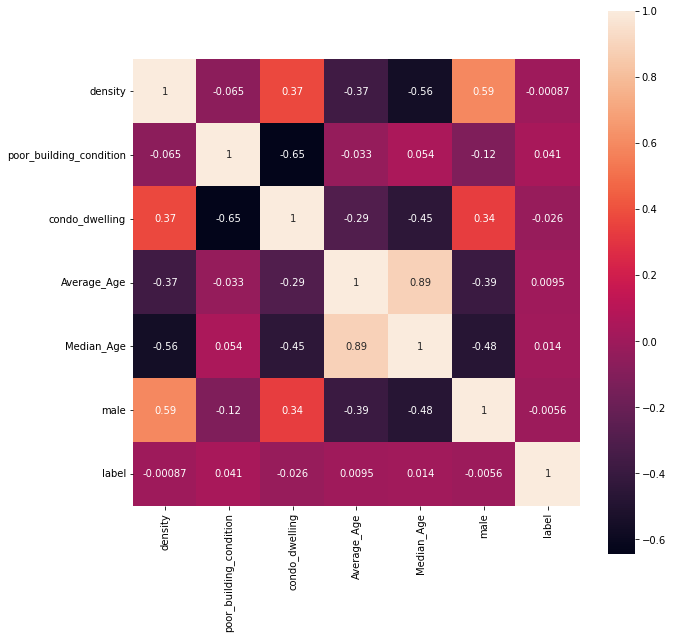

In [22]:
#Pearson Correlation Coefficient 
#corr = df.select_dtypes(include = ['float64', 'int64']).corr()
corr=df[['density','poor_building_condition','condo_dwelling','Average_Age','Median_Age','male','label']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True, annot=True)

In [28]:
# calculate correlation between FSA and 
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (math.sqrt(stat/(obs*mini)))

cramers_V(df['label'],df['FSA'])

0.11001224268757918

In [30]:
Siqi_Variables=['Area_of_Origin','Property_Use','Smoke_Alarm_at_Fire_Origin','Smoke_Alarm_at_Fire_Origin_Alarm_Failure','Smoke_Alarm_at_Fire_Origin_Alarm_Type','Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation','Smoke_Spread','Sprinkler_System_Operation','Sprinkler_System_Presence']
df[Siqi_Variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Area_of_Origin                                                 15623 non-null  object
 1   Property_Use                                                   17535 non-null  object
 2   Smoke_Alarm_at_Fire_Origin                                     11214 non-null  object
 3   Smoke_Alarm_at_Fire_Origin_Alarm_Failure                       11214 non-null  object
 4   Smoke_Alarm_at_Fire_Origin_Alarm_Type                          11214 non-null  object
 5   Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation  11214 non-null  object
 6   Smoke_Spread                                                   11214 non-null  object
 7   Sprinkler_System_Operation                                     11214

In [33]:
n_cat = [df[x].unique().shape[0] for x in Siqi_Variables]

In [36]:
pd.DataFrame(data=n_cat,index=Siqi_Variables, columns=['number of categories']).sort_values(by=['number of categories'], ascending=False)

,number of categories
Property_Use,284
Area_of_Origin,74
Smoke_Alarm_at_Fire_Origin_Alarm_Failure,12
Smoke_Spread,11
Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,8
Sprinkler_System_Operation,8
Smoke_Alarm_at_Fire_Origin_Alarm_Type,7
Smoke_Alarm_at_Fire_Origin,6
Sprinkler_System_Presence,5


In [37]:
#explore different
def exploration_cat(c):

  print('---------------------------------------')

  print('variable name:', c, '\n')
  print('number of categories: ' ,df[c].unique().shape[0], '\n')
  print(df[c].value_counts(normalize=True))

  print('---------------------------------------')

In [39]:
for c in Siqi_Variables:
  exploration_cat(c)

---------------------------------------
variable name: Area_of_Origin 

number of categories:  74 

24 - Cooking Area or Kitchen                                                 0.184216
81 - Engine Area                                                             0.123600
44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri        0.068489
64 - Porch or Balcony                                                        0.061256
22 - Sleeping Area or Bedroom (inc. patients room, dormitory, etc)           0.055751
21 - Living Area (e.g. living, TV, recreation, etc)                          0.038149
75 - Trash, rubbish area (outside)                                           0.027460
97 - Other - unclassified                                                    0.026755
99 - Undetermined  (formerly 98)                                             0.025731
42 - Garage                                                                  0.025667
83 - Electrical Systems                 

# Plot FSA data on map [link](https://stackoverflow.com/questions/58043978/display-data-on-real-map-based-on-postal-code)


In [ ]:
#load sample data
df=pd.read_csv('fire1_FSA.csv')

In [ ]:
df['casualty_flag']=np.where(df['Civilian_Casualties']!=0, 1, 0)

In [ ]:
df_casualty=df['casualty_flag'].groupby(df['FSA']).sum()
df_incident=df['FSA'].value_counts()

In [ ]:
df_casualty=df_casualty.reset_index()
df_incident=df_incident.reset_index()

In [ ]:
df_incident=df_incident.rename(columns={'index':'FSA', 'FSA':'count'})
df_incident.head()

,FSA,count
0,M5A,213
1,M5V,163
2,M3N,153
3,M4Y,153
4,M9W,153


In [ ]:
df_casualty.head()

,FSA,casualty_flag
0,K4A,0
1,L1V,0
2,L3R,0
3,L3T,1
4,L4J,0


In [ ]:
df_casualty_incident=df_incident.merge(df_casualty, how='left', on='FSA')

In [ ]:
df_casualty_incident.head()
df_casualty_incident['likelihood']=df_casualty_incident['casualty_flag']/df_casualty_incident['count']

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 6.3 MB 43.4 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [ ]:
pip install pandas-bokeh

In [ ]:
import geopandas
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()

canada = geopandas.read_file("./gfsa000b11a_e.shp")
ontario = canada[canada['PRUID'] == '35']

# Sample data to plot
#df=pd.DataFrame({'PCODE': ['P0V','P0L','P0T','P0Y', 'P0G', 'P2N'], 'A':[6,3,5,2,2,4] })

# Join ontario dataset with sample data
new_df=ontario.join(df_casualty_incident.set_index('FSA'), on='CFSAUID')


new_df.plot_bokeh(simplify_shapes=20000,
                  category="casualty_flag", 
                  colormap="Spectral", 
                  hovertool_columns=["CFSAUID","A"])

DriverError: ignored